# JPG -> ASCII
En este proyecto trataré de transformar una imagen dada a un txt u otro jpg donde los pixeles sean caracteres ascii

# Pruebas

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image, ImageEnhance

In [23]:
img = cv.imread('imgs/ball.jpg')
img.shape

(500, 677, 3)

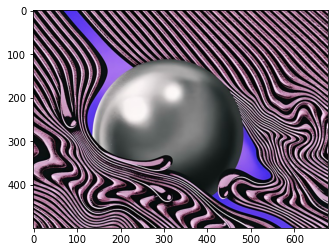

In [24]:
plt.imshow(img)

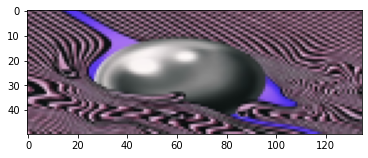

In [25]:
#o primero que queremos es reducir el tamaño de la imagen para que haya menos pixeles que procesar y 
# se noten y vean algo los caracteres. Lo segundo, debemos achatarlo verticalmente, ya que los pixeles son
# cuadrados pero los caracteres no, sino al hacer la traslacion quedaría una imagen estirada
imgr = cv.resize(img,(int(img.shape[1] * 0.2), int(img.shape[0] * 0.1)), interpolation = cv.INTER_AREA)
imgr.shape
plt.imshow(imgr)

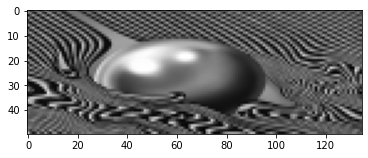

In [26]:
#pasamos a BnW por que la gracia está en jugar con escala de grises
imgrbw = cv.cvtColor(imgr, cv.COLOR_BGR2GRAY)
plt.imshow(imgrbw, cmap = 'gray')

### Ya sabemos como hacer la transformacion de nuestra imagen
### Ahora toca el tema de los ascii, primero vamos a ordenar los ascii por intensidad
Debemos seleccionar una fuente ancho fijo y que de verdad ocupe la letra el ancho, que sea versatil, que pueda tener mucho negro y al mismo tiempo poco algo parecido a consola.
La fuente seleccionada esta en la carpeta fonts, se puede instalar pero no es necesario, puedes usar "consolas".
Todos los caracteres que se van a usar los he exportado como jpg en Photoshop para poder analizar que cantidad de negro tiene cada uno, es lo que haremos a continuacion.

(31, 22, 3)
255


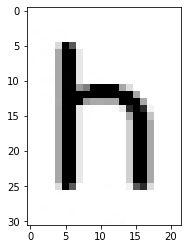

In [27]:
img = cv.imread('fonts/68.jpg')
imgrbw = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
print(img.shape)
print(img[0][0][0])
plt.imshow(imgrbw, cmap = "gray")

In [28]:
range(img.shape[0])

range(0, 31)

In [29]:
def porcentajeNegro(imgs, invert = False):
    img = cv.imread(imgs)
    blk = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            blk = blk + img[i][j][0]
    pct = blk/(img.shape[0]*img.shape[1]*255)
    if invert:
        return pct
    else:
        return 1 - pct


In [30]:
print(porcentajeNegro('fonts/116.jpg'))

0.08484273474785808


In [31]:
#vamos a juntar en paralelo el array del numero de imagen con el de %negro de cada caracter
blkP =[]
number = []
for x in range(61,145):
    blk = porcentajeNegro('fonts/'+str(x)+'.jpg')
    blkP.append(blk)
    number.append(x)
asciBlacks = np.vstack((number, blkP))
print(asciBlacks)

[[6.10000000e+01 6.20000000e+01 6.30000000e+01 6.40000000e+01
  6.50000000e+01 6.60000000e+01 6.70000000e+01 6.80000000e+01
  6.90000000e+01 7.00000000e+01 7.10000000e+01 7.20000000e+01
  7.30000000e+01 7.40000000e+01 7.50000000e+01 7.60000000e+01
  7.70000000e+01 7.80000000e+01 7.90000000e+01 8.00000000e+01
  8.10000000e+01 8.20000000e+01 8.30000000e+01 8.40000000e+01
  8.50000000e+01 8.60000000e+01 8.70000000e+01 8.80000000e+01
  8.90000000e+01 9.00000000e+01 9.10000000e+01 9.20000000e+01
  9.30000000e+01 9.40000000e+01 9.50000000e+01 9.60000000e+01
  9.70000000e+01 9.80000000e+01 9.90000000e+01 1.00000000e+02
  1.01000000e+02 1.02000000e+02 1.03000000e+02 1.04000000e+02
  1.05000000e+02 1.06000000e+02 1.07000000e+02 1.08000000e+02
  1.09000000e+02 1.10000000e+02 1.11000000e+02 1.12000000e+02
  1.13000000e+02 1.14000000e+02 1.15000000e+02 1.16000000e+02
  1.17000000e+02 1.18000000e+02 1.19000000e+02 1.20000000e+02
  1.21000000e+02 1.22000000e+02 1.23000000e+02 1.24000000e+02
  1.2500

(array([ 1.,  1.,  3.,  0.,  1.,  5.,  7.,  9.,  9.,  6.,  9., 15.,  4.,
         6.,  5.,  0.,  2.,  0.,  1.]),
 array([0.01613478, 0.02937061, 0.04260643, 0.05584225, 0.06907808,
        0.0823139 , 0.09554972, 0.10878555, 0.12202137, 0.1352572 ,
        0.14849302, 0.16172884, 0.17496467, 0.18820049, 0.20143631,
        0.21467214, 0.22790796, 0.24114379, 0.25437961, 0.26761543]),
 <BarContainer object of 19 artists>)

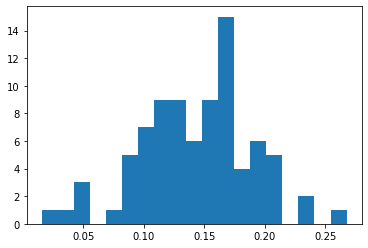

In [32]:
#ploteamos un histograma del %negro para ver un poco la distribucion
plt.hist(asciBlacks[1], bins = 19)

In [33]:
#hayamos que el punto mas claro o mas negro es el 113 (@)
print(asciBlacks[0][asciBlacks[1] == max(asciBlacks[1])], max(asciBlacks[1]))

[113.] 0.2676154332700822


In [34]:
#hayamos que el punto menos claro o menos negro es el 102 (.)
print(asciBlacks[0][asciBlacks[1] == min(asciBlacks[1])], min(asciBlacks[1])) 

[102.] 0.016134782358691258


### Ya hemos analizado nuestros asciis, como vemos tienen un rango de [0.73%, 0.98%]
Como nos la queremos complicar, hemos usado una fuente externa, editado y de suerte nos ha funcionado cuando podriamos haber usado consolas que es ancho fijo pero bueno.
Ahora vamos a normalizar este rango a [0:225] y despues vamos a asociarle a cada valor la letra que le corresponde para empezar ya a tener el "pincel" listo

In [15]:
norm = []
for x in asciBlacks[1]:
    aux = x - min(asciBlacks[1])
    aux = aux / (max(asciBlacks[1]) - min(asciBlacks[1]))
    aux = aux * 255
    norm.append(aux)
pincel = np.vstack((asciBlacks,norm))
print(max(pincel[2]))

255.0


(array([ 1.,  1.,  3.,  0.,  1.,  5.,  7.,  9.,  9.,  6.,  9., 15.,  4.,
         6.,  5.,  0.,  2.,  0.,  1.]),
 array([  0.        ,  13.42105263,  26.84210526,  40.26315789,
         53.68421053,  67.10526316,  80.52631579,  93.94736842,
        107.36842105, 120.78947368, 134.21052632, 147.63157895,
        161.05263158, 174.47368421, 187.89473684, 201.31578947,
        214.73684211, 228.15789474, 241.57894737, 255.        ]),
 <BarContainer object of 19 artists>)

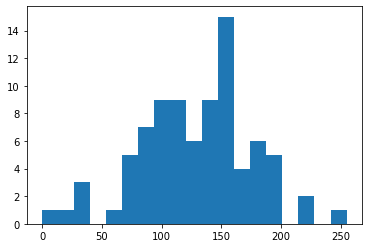

In [16]:
plt.hist(pincel[2], bins = 19)

In [17]:
#ahora toca asociar los valores a mano...
chars = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','r','s','t','u','v','w','x','y','z','{','|','}','~','!','"','#','$','%','&','(','*','+','.','/','1','2','3','4','5','6','7','8','9','@',';',':','>','?','A','B','C','D','E','F','G','H','I','J','K','L','M','N','Ñ','O','P','Q','R','S','T','U','V','W','X','Y','Z']      
print(len(chars), len(pincel[0]))

84 84


In [18]:
pincel = np.vstack((pincel,chars))

In [19]:
#por ultimo vamos a ordenar el array por la intensidad de pixel
print(max(norm))
norm = np.array(norm)
pincel[0]=pincel[0][norm.argsort()]
pincel[1]=pincel[1][norm.argsort()]
pincel[3]=pincel[3][norm.argsort()]
pincel[2]=pincel[2][norm.argsort()]

255.0


In [20]:
print(pincel[2])

['0.0' '16.185663656110695' '26.855607636904086' '37.572196181548016'
 '38.178575511604045' '54.16016920086892' '69.66948668114784'
 '72.74219732479712' '77.93140505316113' '78.85846575968904'
 '79.07419686749745' '83.7503143935064' '84.35086315308112'
 '84.79398650966046' '84.8872756373614' '90.3855036012347'
 '90.75866011203838' '91.3242254487253' '94.23368011889788'
 '94.56602263633246' '96.42014404938837' '101.34697610609355'
 '102.11078083914487' '102.84543271978966' '103.81330741968678'
 '105.37590030867734' '106.12221333028475' '110.69921115811144'
 '111.18314850805989' '111.69623871041507' '114.83891619983997'
 '114.83891619983997' '117.25277237910139' '118.5938035898022'
 '119.17103006745174' '120.71030067451696' '121.95221218703554'
 '123.40985480736254' '123.84131702297937' '124.6226134674746'
 '130.79135703669834' '131.24031096375896' '134.53458328569798'
 '135.27506573682408' '136.30707671201552' '138.36526809191727'
 '140.03281124957127' '144.56316451354752' '145.37361381

### Ya tenemos nuestro pincel mas que listo
## PINCEL [imgNum, blk%, norm, char]
Ahora nos queda la pintacion SIUUUUUU.
La idea es que dada una imagen y una resolucion, la resizeemos y pongamos en blanco y negro (quiza necesitemos hacerle un preedit), teniendo en cuenta que nuestros caracteres no son cuadrados, y ya con eso ir leyendo y pintando con nuestros chars. Deberemos tambien definir una funcion selectora de los chars


# FINAL
Aqui está lo imprescindible para ejecutar el invento

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image, ImageEnhance
from IPython.display import clear_output
#from numba import jit, cuda

In [31]:
def porcentajeNegro(imgs, invert = False):
    img = cv.imread(imgs)
    blk = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            blk = blk + img[i][j][0]
    pct = blk/(img.shape[0]*img.shape[1]*255)
    if invert:
        return pct
    else:
        return 1 - pct


In [32]:
#Selector caracter
def charSelektor(pincel, pixel):
    dist = 256
    i = 0
    while ( i < pincel.shape[1]) and (abs(pixel - float(pincel[2][i])) <= dist ):
        dist = pixel - float(pincel[2][i])
        i = i + 1
        
    if i == pincel.shape[1]-1:
        if (pixel-float(pincel[2][i])) <= (pixel- float(pincel[2][i-1])):
            return pincel[3][i]
            
    return pincel[3][i-1]

In [41]:
#la funcion principal
#@jit(target="cuda")
def jpgToAscii(imgstr, pincel, res, contrast = 1):
    img = cv.imread(imgstr)
    imgr = cv.resize(img,(int(img.shape[1] * res*2), int(img.shape[0] * res)), interpolation = cv.INTER_AREA)
    imagen = cv.cvtColor(imgr, cv.COLOR_BGR2GRAY)
    if(contrast != 1):
        im = Image.fromarray(imagen)
        enh = ImageEnhance.Contrast(im)
        im = enh.enhance(contrast)
        imagen = np.array(im)
    file = open('out/canvas.txt', 'w')
    tot = imagen.shape[0]
    for i in range(0,imagen.shape[0]):
        for j in range(0,imagen.shape[1]):
            file.write(charSelektor(pincel,imagen[i][j]))
        file.write('\n')
        clear_output()
        print(str(int(100*i/tot) )+ '%')
    file.close()
    clear_output()
    print("100%")

In [34]:
def getPincel(invert = False):
    blkP =[]
    number = []
    for x in range(61,145):
        blk = porcentajeNegro('fonts/'+str(x)+'.jpg', invert)
        blkP.append(blk)
        number.append(x)
    asciBlacks = np.vstack((number, blkP))
    norm = []
    for x in asciBlacks[1]:
        aux = x - min(asciBlacks[1])
        aux = aux / (max(asciBlacks[1]) - min(asciBlacks[1]))
        aux = aux * 255
        norm.append(aux)
    pincel = np.vstack((asciBlacks,norm))
    chars = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','r','s','t','u','v','w','x','y','z','{','|','}','~','!','"','#','$','%','&','(','*','+','.','/','1','2','3','4','5','6','7','8','9','@',';',':','>','?','A','B','C','D','E','F','G','H','I','J','K','L','M','N','Ñ','O','P','Q','R','S','T','U','V','W','X','Y','Z']      
    pincel = np.vstack((pincel,chars))
    norm = np.array(norm)
    pincel[0]=pincel[0][norm.argsort()]
    pincel[1]=pincel[1][norm.argsort()]
    pincel[3]=pincel[3][norm.argsort()]
    pincel[2]=pincel[2][norm.argsort()]
    return pincel

In [42]:
#el parametro invert crea un pincel con los colores invertidos,
#si usas un visor de texto con fondo blanco usa invert = True, sino False
pincel = getPincel(invert = False)
#parametros:
# imagen a renderizar,
#pincel, 
#ratio de compresion: complejidad(On^2), cuidado
#contraste: <1 = menos contraste, >1 = mayor contraste. Es un parametro interesante para la calidad del resultado
jpgToAscii('imgs/modus.jpg', pincel, 0.4, 1.5)

100%
